<a href="https://colab.research.google.com/github/rhaagsma/Projeto_Final_Marvel/blob/insight-2/InsightsCharacteresComicsEvents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import sqlite3
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Top 10 personagens que estão em mais comics

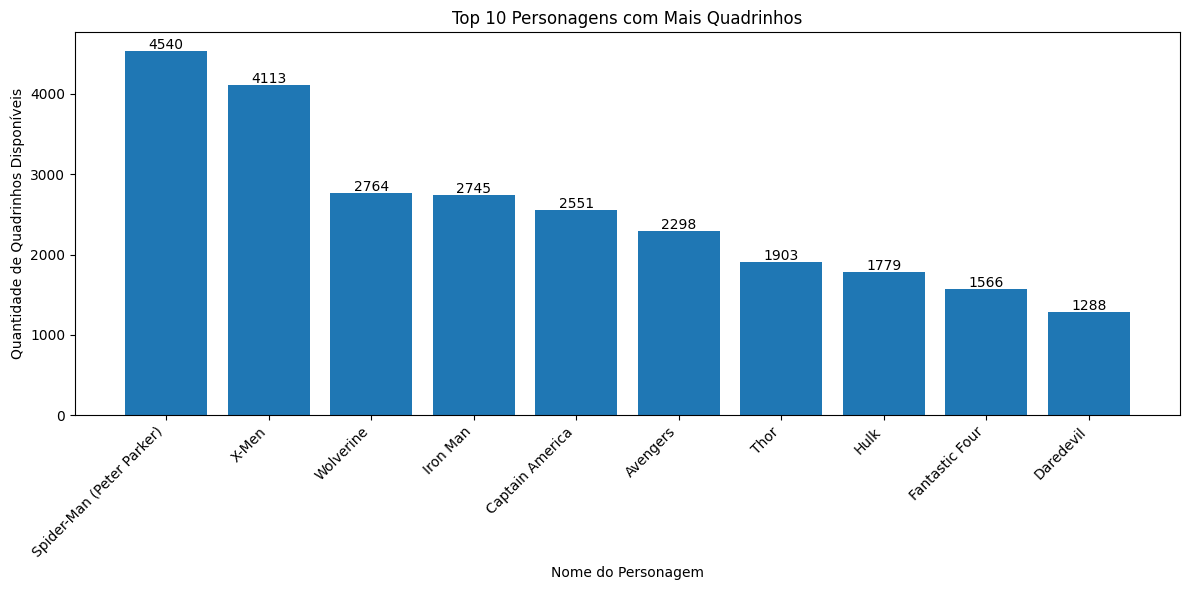

In [ ]:
con = sqlite3.connect('banco.db')
query = """
      SELECT
            name,
            comics_available
      FROM characters
      ORDER BY comics_available DESC
      LIMIT 10;
"""
df = pd.read_sql_query(query, con)
con.close()

plt.figure(figsize=(12, 6))
plt.bar(df['name'], df['comics_available'])
plt.xlabel("Nome do Personagem")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Top 10 Personagens com Mais Quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df['comics_available']):
    plt.text(i, v + 25, f"{v}", ha='center')

plt.show()

### Quantidade de quadrinhos de um personagem por décadas


In [ ]:
conn = sqlite3.connect('banco.db')

query = """
    SELECT
        (c.year / 10) * 10 AS decade,
        ch.name AS personagem,
        COUNT(*) as participacoes,
        ROW_NUMBER() OVER (PARTITION BY (c.year / 10) * 10  ORDER BY COUNT(*) DESC) AS posicao
    FROM comics c
    JOIN characters_comics cc ON cc.comic_id == c.id
    JOIN characters ch ON cc.character_id == ch.id
    WHERE decade != 0
    GROUP BY ch.id, ch.name, decade
    ORDER BY decade, participacoes DESC
"""
df_decade = pd.read_sql_query(query, conn)

conn.close()
df_decade

decade                                personagem  participacoes  posicao
0       1930                               Human Torch             88        1
1       1930                               Sub-Mariner             88        2
2       1930                                 Archangel             77        3
3       1930                                   Patriot             49        4
4       1930                              Miss America             37        5
5       1930                                    Vision             36        6
6       1930                                    Ka-Zar             23        7
7       1930                                   Electro             16        8
8       1930                           Captain America             11        9
9       1930                            Blonde Phantom              8       10
10      1930                 Human Torch (Jim Hammond)              7       11
11      1930                            Winter Soldier              5       12
12      1930                                    Namora              4       13
13      1930                     Toro (Thomas Raymond)              4       14
14      1930                                     Namor              3       15
15      1930                   Angel (Thomas Halloway)              3       16
16      1930                             Venus (Siren)              1       17
17      1940                               Two-Gun Kid            127        1
18      1940                           Captain America            111        2
19      1940                               Human Torch            110        3
20      1940                               Sub-Mariner             77        4
21      1940                                 Archangel             23        5
22      1940                                    Namora             14        6
23      1940                            Winter Soldier             11        7
24      1940                          Millie the Model             11        8
25      1940                                  Kid Colt              6        9
26      1940                            Blonde Phantom              5       10
27      1940                                Marvel Boy              2       11
28      1940                                  Mephisto              2       12
29      1940                                 Red Skull              2       13
30      1940                    Hellcat (Patsy Walker)              2       14
31      1940                              Miss America              2       15
32      1940                               Black Widow              1       16
33      1940                                  Countess              1       17
34      1940                                    Falcon              1       18
35      1940                                 Firebrand              1       19
36      1940                                    Medusa              1       20
37      1940                                   Patriot              1       21
38      1940                            Spencer Smythe              1       22
39      1940                               Rawhide Kid              1       23
40      1940                                Blue Blade              1       24
41      1950                               Rawhide Kid            116        1
42      1950                                  Iron Man             63        2
43      1950                            Doctor Strange             57        3
44      1950                           Captain America             49        4
45      1950                                      Thor             46        5
46      1950                                 Nick Fury             39        6
47      1950                               Human Torch             32        7
48      1950                               Sub-Mariner             29        8
49      1950                                      Hulk  

### Décadas com mais quadrinhos

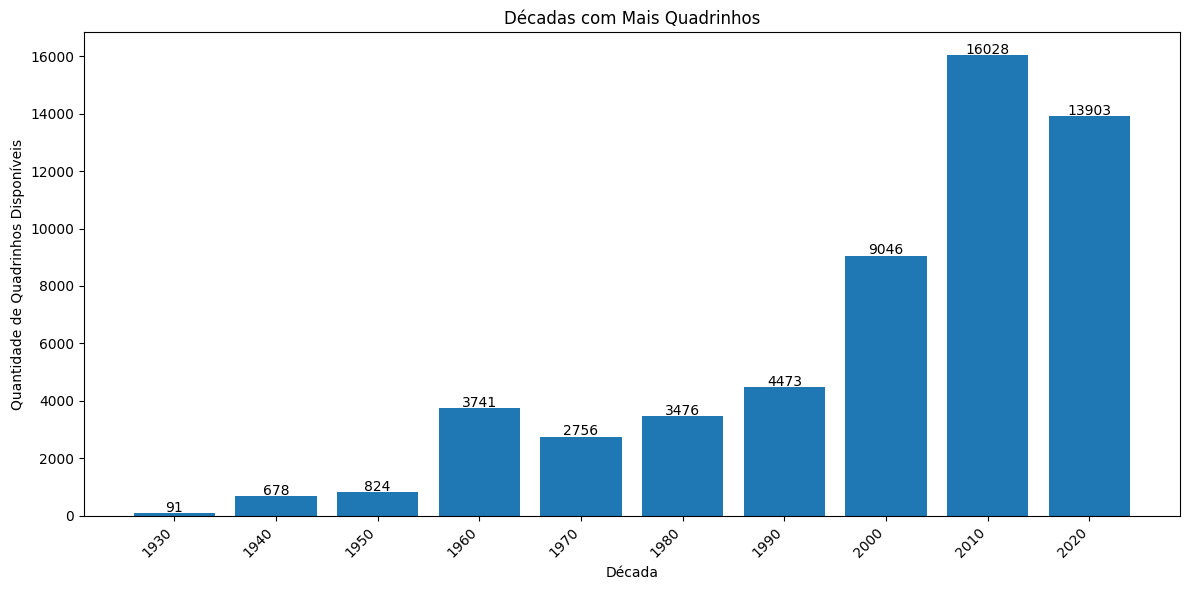

In [ ]:
conn = sqlite3.connect('banco.db')

query = """
    SELECT
        (c.year / 10) * 10 AS decade,
        COUNT(*) as quantidade_comics
    FROM comics c
    WHERE decade != 0
    GROUP BY decade
"""
decades = pd.read_sql_query(query, conn)

conn.close()
decades
plt.figure(figsize=(12, 6))
plt.bar(decades['decade'].astype(str), decades['quantidade_comics'])
plt.xlabel("Década")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Décadas com Mais Quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(decades['quantidade_comics']):
    plt.text(i, v + 50, f"{v}", ha='center')

plt.show()

### Personagens como mais participações em quadrinhos por década

In [ ]:
df_cd = (df_decade[df_decade['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['decade', 'personagem', 'participacoes',]
df_cd[colunas_desejadas]

decade                 personagem  participacoes
0    1930                Human Torch             88
1    1940                Two-Gun Kid            127
2    1950                Rawhide Kid            116
3    1960                       Thor            553
4    1970  Spider-Man (Peter Parker)            390
5    1980                      X-Men            863
6    1990  Spider-Man (Peter Parker)            807
7    2000                      X-Men           1000
8    2010  Spider-Man (Peter Parker)            840
9    2020                      X-Men            456

### Top 10 personagens com mais comics por década

In [ ]:
df = (df_decade[df_decade['posicao'].isin(range(1,11))]).reset_index(drop=True)
colunas_desejadas = ['decade', 'personagem', 'participacoes',]
df[colunas_desejadas]

decade                  personagem  participacoes
0     1930                 Human Torch             88
1     1930                 Sub-Mariner             88
2     1930                   Archangel             77
3     1930                     Patriot             49
4     1930                Miss America             37
5     1930                      Vision             36
6     1930                      Ka-Zar             23
7     1930                     Electro             16
8     1930             Captain America             11
9     1930              Blonde Phantom              8
10    1940                 Two-Gun Kid            127
11    1940             Captain America            111
12    1940                 Human Torch            110
13    1940                 Sub-Mariner             77
14    1940                   Archangel             23
15    1940                      Namora             14
16    1940              Winter Soldier             11
17    1940            Millie the Model             11
18    1940                    Kid Colt              6
19    1940              Blonde Phantom              5
20    1950                 Rawhide Kid            116
21    1950                    Iron Man             63
22    1950              Doctor Strange             57
23    1950             Captain America             49
24    1950                        Thor             46
25    1950                   Nick Fury             39
26    1950                 Human Torch             32
27    1950                 Sub-Mariner             29
28    1950                        Hulk             20
29    1950                        Loki             20
30    1960                        Thor            553
31    1960             Captain America            544
32    1960   Spider-Man (Peter Parker)            513
33    1960                    Iron Man            494
34    1960                        Hulk            482
35    1960              Fantastic Four            458
36    1960                    Avengers            457
37    1960                   Daredevil            438
38    1960                 Human Torch            337
39    1960             Invisible Woman            279
40    1970   Spider-Man (Peter Parker)            390
41    1970                   Defenders            159
42    1970                   Shang-Chi            140
43    1970              Doctor Strange            137
44    1970      Iron Fist (Danny Rand)            113
45    1970  Ghost Rider (Johnny Blaze)            101
46    1970                       Thing             73
47    1970                        Hulk             60
48    1970                     Dracula             58
49    1970           Werewolf By Night             57
50    1980                       X-Men            863
51    1980                   Wolverine            655
52    1980                       Storm            332
53    1980                    Colossus            326
54    1980                Nightcrawler            317
55    1980                     Cyclops            310
56    1980   Spider-Man (Peter Parker)            277
57    1980                    Iron Man            260
58    1980                       Beast            255
59    1980                   Archangel            242
60    1990   Spider-Man (Peter Parker)            807
61    1990                       X-Men            486
62    1990             Captain America            268
63    1990                    Iron Man            267
64    1990              Fantastic Four            265
65    1990                   Wolverine            202
66    1990                        Thor            196
67    1990                   Daredevil            191
68    1990                    Avengers            178
69    1990                 Human Torch            173
70    2000                       X-Men           1000
71    2000                   Wolverine            770
72    2000   Spider-Man (Peter Parker)            754
73    20

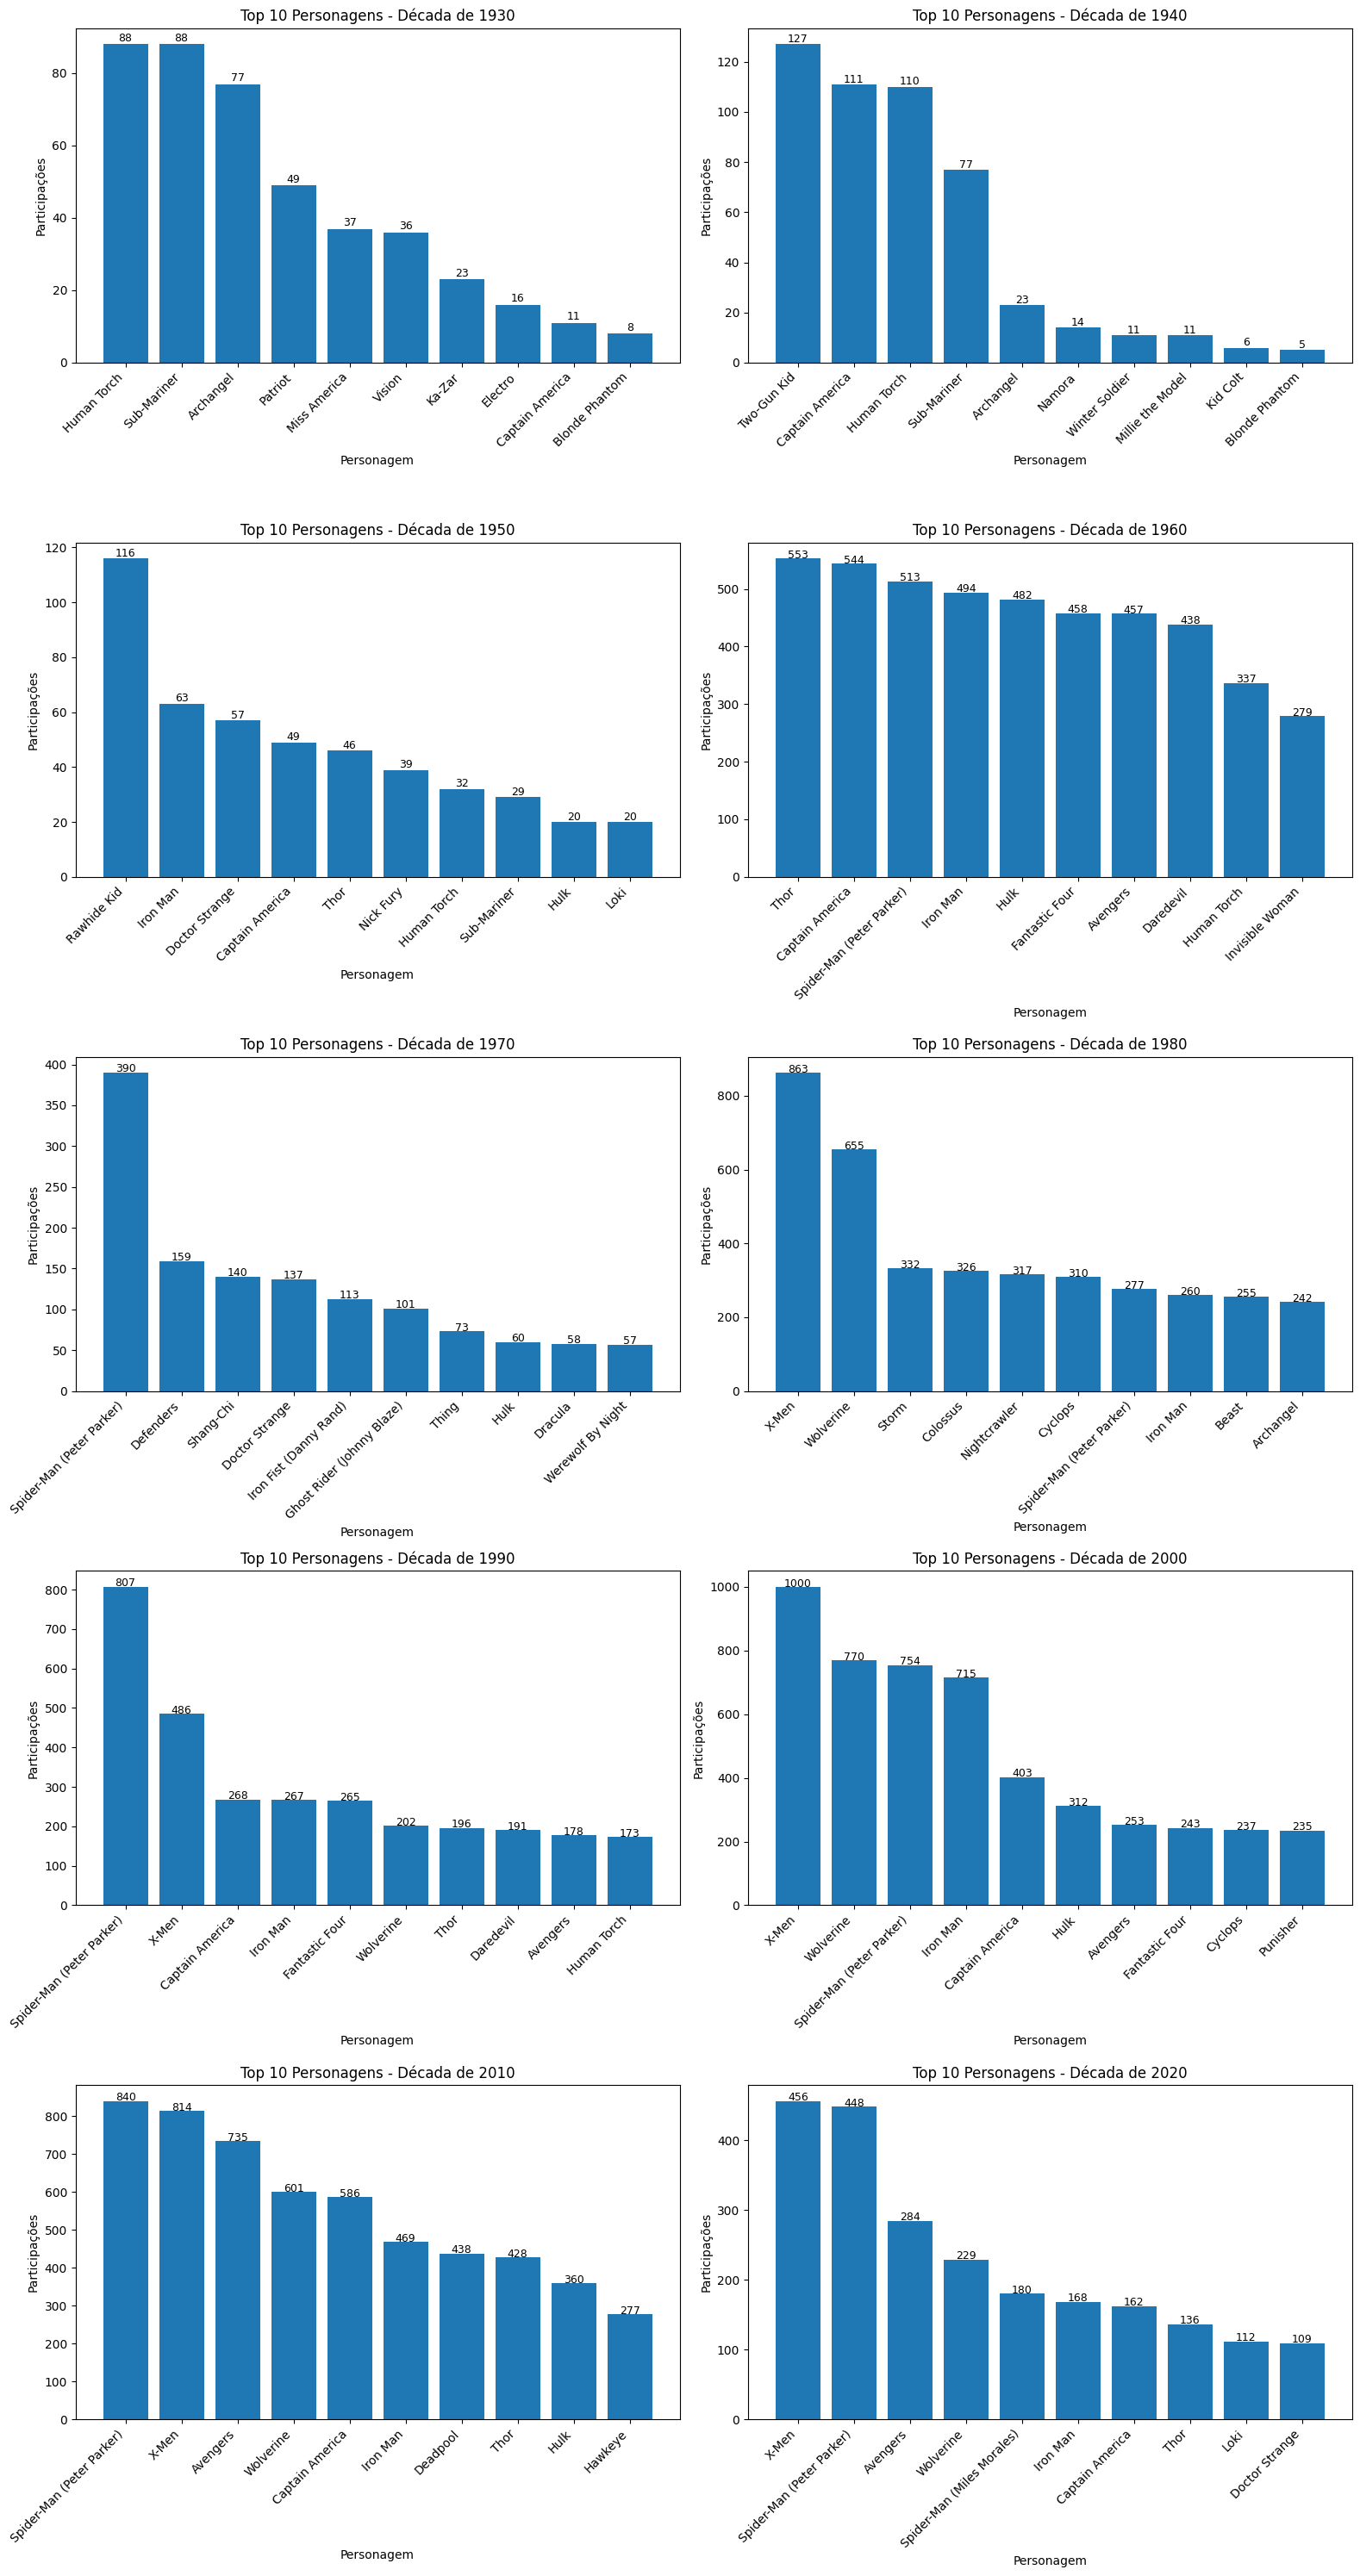

In [ ]:
decadas = df['decade'].unique()
decadas.sort()

# Layout dos subplots
num_decadas = len(decadas)
linhas = (num_decadas + 1) // 2
colunas = 2

# Tamanho da figura
plt.figure(figsize=(16, 6 * linhas))

# Loop para criar um subplot por década
for i, dec in enumerate(decadas, 1):
    plt.subplot(linhas, colunas, i)
    dados = df[df['decade'] == dec].sort_values('participacoes', ascending=False)

    personagens = dados['personagem']
    participacoes = dados['participacoes']

    plt.bar(personagens, participacoes)
    plt.xlabel("Personagem")
    plt.ylabel("Participações")
    plt.title(f"Top 10 Personagens - Década de {dec}")
    plt.xticks(rotation=45, ha='right')

    # Adiciona os valores acima das barras
    for j, v in enumerate(participacoes):
        plt.text(j, v + 0.8, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Personagens que participaram de mais eventos

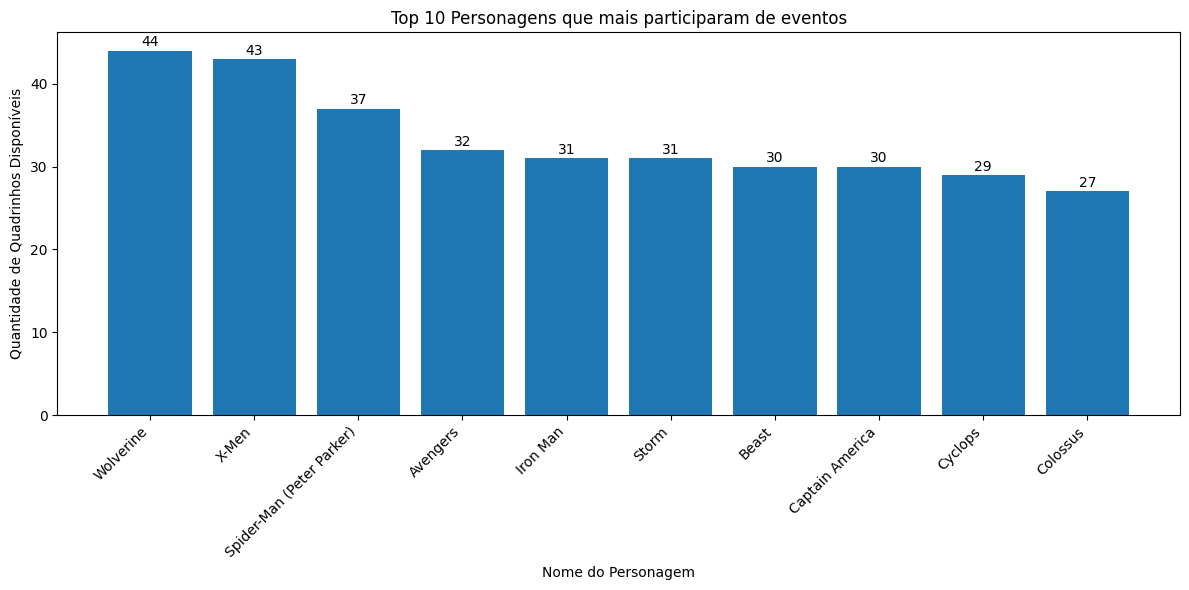

In [ ]:
con = sqlite3.connect('banco.db')
query = """
      SELECT
            name,
            events_available
      FROM characters
      ORDER BY events_available DESC
      LIMIT 10;
"""
df_personagens = pd.read_sql_query(query, con)
con.close()

plt.figure(figsize=(12, 6))
plt.bar(df_personagens['name'], df_personagens['events_available'])
plt.xlabel("Nome do Personagem")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Top 10 Personagens que mais participaram de eventos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_personagens['events_available']):
    plt.text(i, v + 0.5, f"{v}", ha='center')

plt.show()

### Quantidade de participações de personagem em quadrinhos por em evento

In [ ]:
conn = sqlite3.connect('banco.db')

query = """
        SELECT
            e.title AS evento,
            ch.name AS personagem,
            COUNT(*) AS total_participacoes,
            e.amount_comics AS quantidade_comics,
            ROW_NUMBER() OVER (PARTITION BY e.title ORDER BY COUNT(*) DESC) AS posicao
        FROM comics c
        JOIN characters_comics cc ON cc.comic_id = c.id
        JOIN characters ch ON cc.character_id = ch.id
        JOIN comics_events ce ON ce.comic_id = c.id
        JOIN events e ON ce.event_id = e.id
        GROUP BY e.id, e.title, ch.name
        ORDER BY quantidade_comics DESC
"""

df2 = pd.read_sql_query(query, conn)
conn.close()

In [ ]:
df2

evento  \
0                             Dark Reign   
1                             Dark Reign   
2                             Dark Reign   
3                             Dark Reign   
4                             Dark Reign   
5                             Dark Reign   
6                             Dark Reign   
7                             Dark Reign   
8                             Dark Reign   
9                             Dark Reign   
10                            Dark Reign   
11                            Dark Reign   
12                            Dark Reign   
13                            Dark Reign   
14                            Dark Reign   
15                            Dark Reign   
16                            Dark Reign   
17                            Dark Reign   
18                            Dark Reign   
19                            Dark Reign   
20                            Dark Reign   
21                            Dark Reign   
22                            Dark Reign   
23                            Dark Reign   
24                            Dark Reign   
25                            Dark Reign   
26                            Dark Reign   
27                            Dark Reign   
28                            Dark Reign   
29                            Dark Reign   
30                            Dark Reign   
31                            Dark Reign   
32                            Dark Reign   
33                            Dark Reign   
34                            Dark Reign   
35                            Dark Reign   
36                            Dark Reign   
37                            Dark Reign   
38                            Dark Reign   
39                            Dark Reign   
40                            Dark Reign   
41                            Dark Reign   
42                            Dark Reign   
43                            Dark Reign   
44                            Dark Reign   
45                            Dark Reign   
46                            Dark Reign   
47                            Dark Reign   
48                            Dark Reign   
49                            Dark Reign   
50                            Dark Reign   
51                            Dark Reign   
52                            Dark Reign   
53                            Dark Reign   
54                            Dark Reign   
55                            Dark Reign   
56                            Dark Reign   
57                            Dark Reign   
58                            Dark Reign   
59                            Dark Reign   
60                            Dark Reign   
61                            Dark Reign   
62                            Dark Reign   
63                            Dark Reign   
64                            Dark Reign   
65                            Dark Reign   
66                            Dark Reign   
67                            Dark Reign   
68                            Dark Reign   
69                            Dark Reign   
70                            Dark Reign   
71                            Dark Reign   
72                            Dark Reign   
73                            Dark Reign   
74                            Dark Reign   
75                            Dark Reign   
76                            Dark Reign   
77                            Dark Reign   
78                            Dark Reign   
79                            Dark Reign   
80                            Dark Reign   
81                            Dark Reign   
82                            Dark Reign   
83                            Dark Reign   
84                            Dark Reign   
85                            Dark Reign   
86                            Dark Reign   
87                            Dark Reign   
88                            Dark Reign   
89                            Dark Reign   
90                            

### Teste

In [ ]:
df_grouped_by_character = df2[df2['posicao'] == 1].groupby('personagem').size().reset_index(name='vezes_mais_participacoes')
df_grouped_by_character = df_grouped_by_character.sort_values(by='vezes_mais_participacoes', ascending=False)

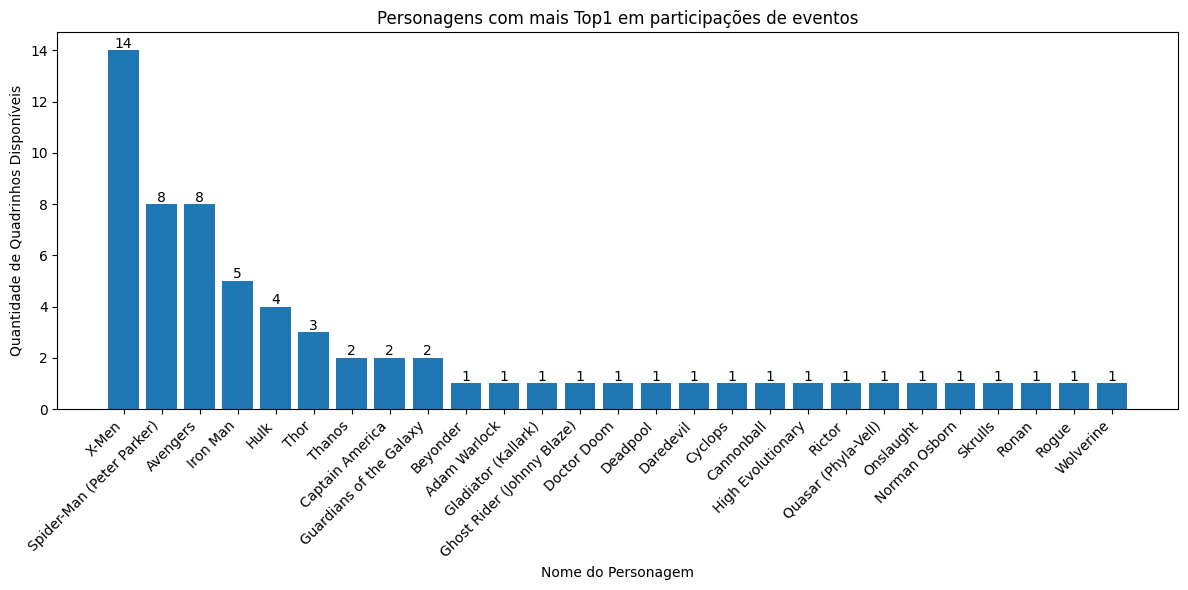

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_grouped_by_character['personagem'], df_grouped_by_character['vezes_mais_participacoes'])
plt.xlabel("Nome do Personagem")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Personagens com mais Top1 em participações de eventos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_grouped_by_character['vezes_mais_participacoes']):
    plt.text(i, v + 0.1, f"{v}", ha='center')

plt.show()

### Top 10 eventos com mais quadrinhos

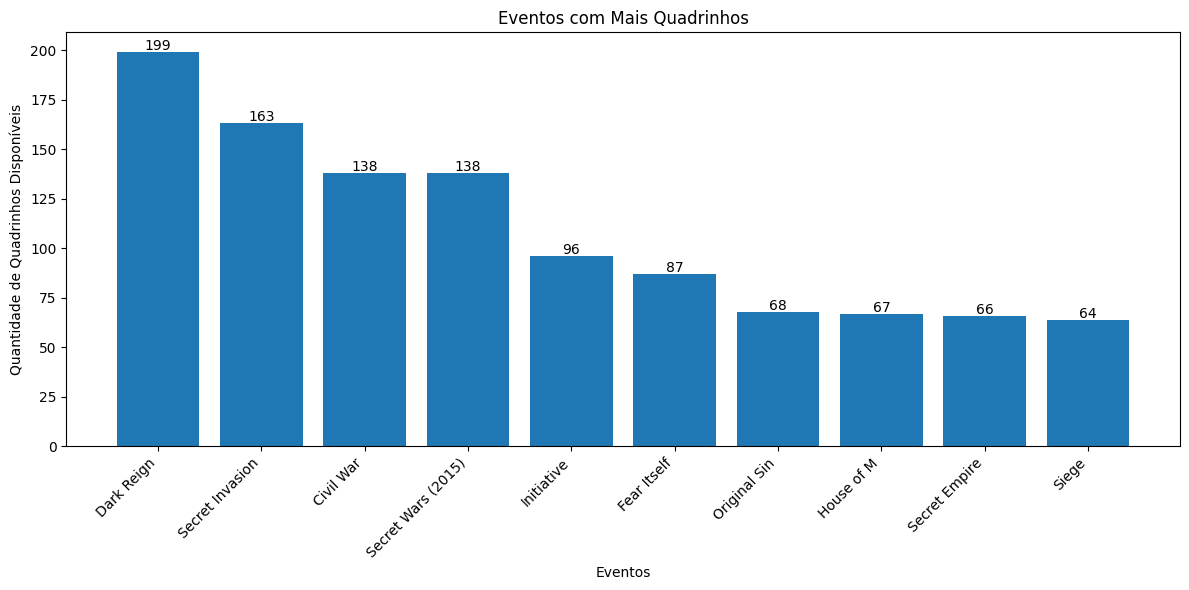

In [ ]:
result_df = (df2[df2['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['evento', 'quantidade_comics']
df_eventos = result_df[colunas_desejadas].head(10)
df_eventos

plt.figure(figsize=(12, 6))
plt.bar(df_eventos['evento'].astype(str), df_eventos['quantidade_comics'])
plt.xlabel("Eventos")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Eventos com Mais Quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_eventos['quantidade_comics']):
    plt.text(i, v + 1, f"{v}", ha='center')

plt.show()

### Personagens com mais participações em comics por evento

In [ ]:
result_df = (df2[df2['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['evento', 'personagem', 'total_participacoes', 'quantidade_comics']
df_comics = result_df[colunas_desejadas].head(50)
df_comics

evento                 personagem  \
0                           Dark Reign              Norman Osborn   
1                      Secret Invasion                    Skrulls   
2                            Civil War                   Iron Man   
3                   Secret Wars (2015)                   Avengers   
4                           Initiative                   Iron Man   
5                          Fear Itself                   Iron Man   
6                         Original Sin                   Avengers   
7                           House of M                      X-Men   
8                        Secret Empire            Captain America   
9                                Siege                       Thor   
10                  Acts of Vengeance!  Spider-Man (Peter Parker)   
11                   Age of Apocalypse                      X-Men   
12                                Axis                   Deadpool   
13                      World War Hulk                       Hulk   
14                            Infinity                   Avengers   
15                   Avengers VS X-Men                   Avengers   
16                        War of Kings    Guardians of the Galaxy   
17                         Secret Wars  Spider-Man (Peter Parker)   
18                      Secret Wars II                   Beyonder   
19               Avengers Disassembled            Captain America   
20                             Inferno                      X-Men   
21                        Infinity War                     Thanos   
22                           Onslaught                  Onslaught   
23                    Shattered Heroes                   Avengers   
24                        Annihilation                      Ronan   
25                        Spider-Verse  Spider-Man (Peter Parker)   
26                          Shadowland                  Daredevil   
27                       Spider-Island  Spider-Man (Peter Parker)   
28              Annihilation: Conquest        Quasar (Phyla-Vell)   
29                      Realm of Kings        Gladiator (Kallark)   
30                X-Men: Second Coming                      X-Men   
31                    X-Men: Regenesis                      X-Men   
32                           Chaos War                       Thor   
33                   Fall of the Hulks                       Hulk   
34                         Marvel NOW!    Guardians of the Galaxy   
35                    Maximum Security                      Rogue   
36                     Messiah CompleX                      X-Men   
37                       Age of Ultron                   Avengers   
38  Dead No More: The Clone Conspiracy  Spider-Man (Peter Parker)   
39                  Inhumans Vs. X-Men                      X-Men   
40                         Planet Hulk                       Hulk   
41                     World War Hulks                       Hulk   
42                  Enemy of the State                  Wolverine   
43                 Fall of the Mutants                      X-Men   
44                     Maximum Carnage  Spider-Man (Peter Parker)   
45                    Atlantis Attacks                      X-Men   
46                          Inhumanity                   Avengers   
47                            Crossing                   Iron Man   
48                     Mutant Massacre                      X-Men   
49                          Armor Wars                   Iron Man   

    total_participacoes  quantidade_comics  
0                    28                199  
1                    40                163  
2                    44                138  
3                     9                138  
4                    24                 96  
5                    14                 87  
6                    15                 68  
7                    23                 67  
8                    13                 66  
9                    12                 64  
10               

### Top 10 personagens com mais participações no top 10 de eventos com mais quadrinhos

In [ ]:
result_df = (df2[df2['posicao'].isin(range(1,11))]).reset_index(drop=True)
colunas_desejadas = ['evento', 'personagem', 'total_participacoes', 'quantidade_comics']
df_comics = result_df[colunas_desejadas].head(100)
df_comics

evento                      personagem  total_participacoes  \
0           Dark Reign                   Norman Osborn                   28   
1           Dark Reign       Spider-Man (Peter Parker)                   22   
2           Dark Reign                        Iron Man                   20   
3           Dark Reign                   Dark Avengers                   17   
4           Dark Reign                    Thunderbolts                   16   
5           Dark Reign                       Wolverine                   14   
6           Dark Reign                        The Hood                   13   
7           Dark Reign  Captain Marvel (Carol Danvers)                   12   
8           Dark Reign                           X-Men                   12   
9           Dark Reign                           Daken                   11   
10     Secret Invasion                         Skrulls                   40   
11     Secret Invasion                        Avengers                   14   
12     Secret Invasion                        Iron Man                   10   
13     Secret Invasion                        Hank Pym                    9   
14     Secret Invasion       Spider-Man (Peter Parker)                    9   
15     Secret Invasion                           X-Men                    7   
16     Secret Invasion                         3-D Man                    6   
17     Secret Invasion                       Nick Fury                    6   
18     Secret Invasion                            Thor                    6   
19     Secret Invasion         Yellowjacket (Hank Pym)                    6   
20           Civil War                        Iron Man                   44   
21           Civil War                 Captain America                   37   
22           Civil War       Spider-Man (Peter Parker)                   34   
23           Civil War                       Wolverine                   21   
24           Civil War                        Avengers                   16   
25           Civil War                     Human Torch                   14   
26           Civil War                  Fantastic Four                   13   
27           Civil War                         Cyclops                   12   
28           Civil War        Sentry (Robert Reynolds)                   12   
29           Civil War                        Colossus                   11   
30  Secret Wars (2015)                        Avengers                    9   
31  Secret Wars (2015)                  Fantastic Four                    9   
32  Secret Wars (2015)                         Magneto                    4   
33  Secret Wars (2015)                   Silver Surfer                    3   
34  Secret Wars (2015)                         Polaris                    2   
35  Secret Wars (2015)                        Punisher                    2   
36  Secret Wars (2015)                      Black Bolt                    1   
37  Secret Wars (2015)                        Inhumans                    1   
38  Secret Wars (2015)                          Medusa                    1   
39  Secret Wars (2015)                       Sugar Man                    1   
40          Initiative                        Iron Man                   24   
41          Initiative  Captain Marvel (Carol Danvers)                   12   
42          Initiative                        Avengers                   11   
43          Initiative                     Black Widow                    8   
44          Initiative                  Fantastic Four                    8   
45          Initiative                    New Warriors                    8   
46          Initiative                  Night Thrasher                    8   
47          Initiative        Sentry (Robert Reynolds)                    8   
48          Initiative                    Thunderbolts                    8   
49          Initiative                            Ares            

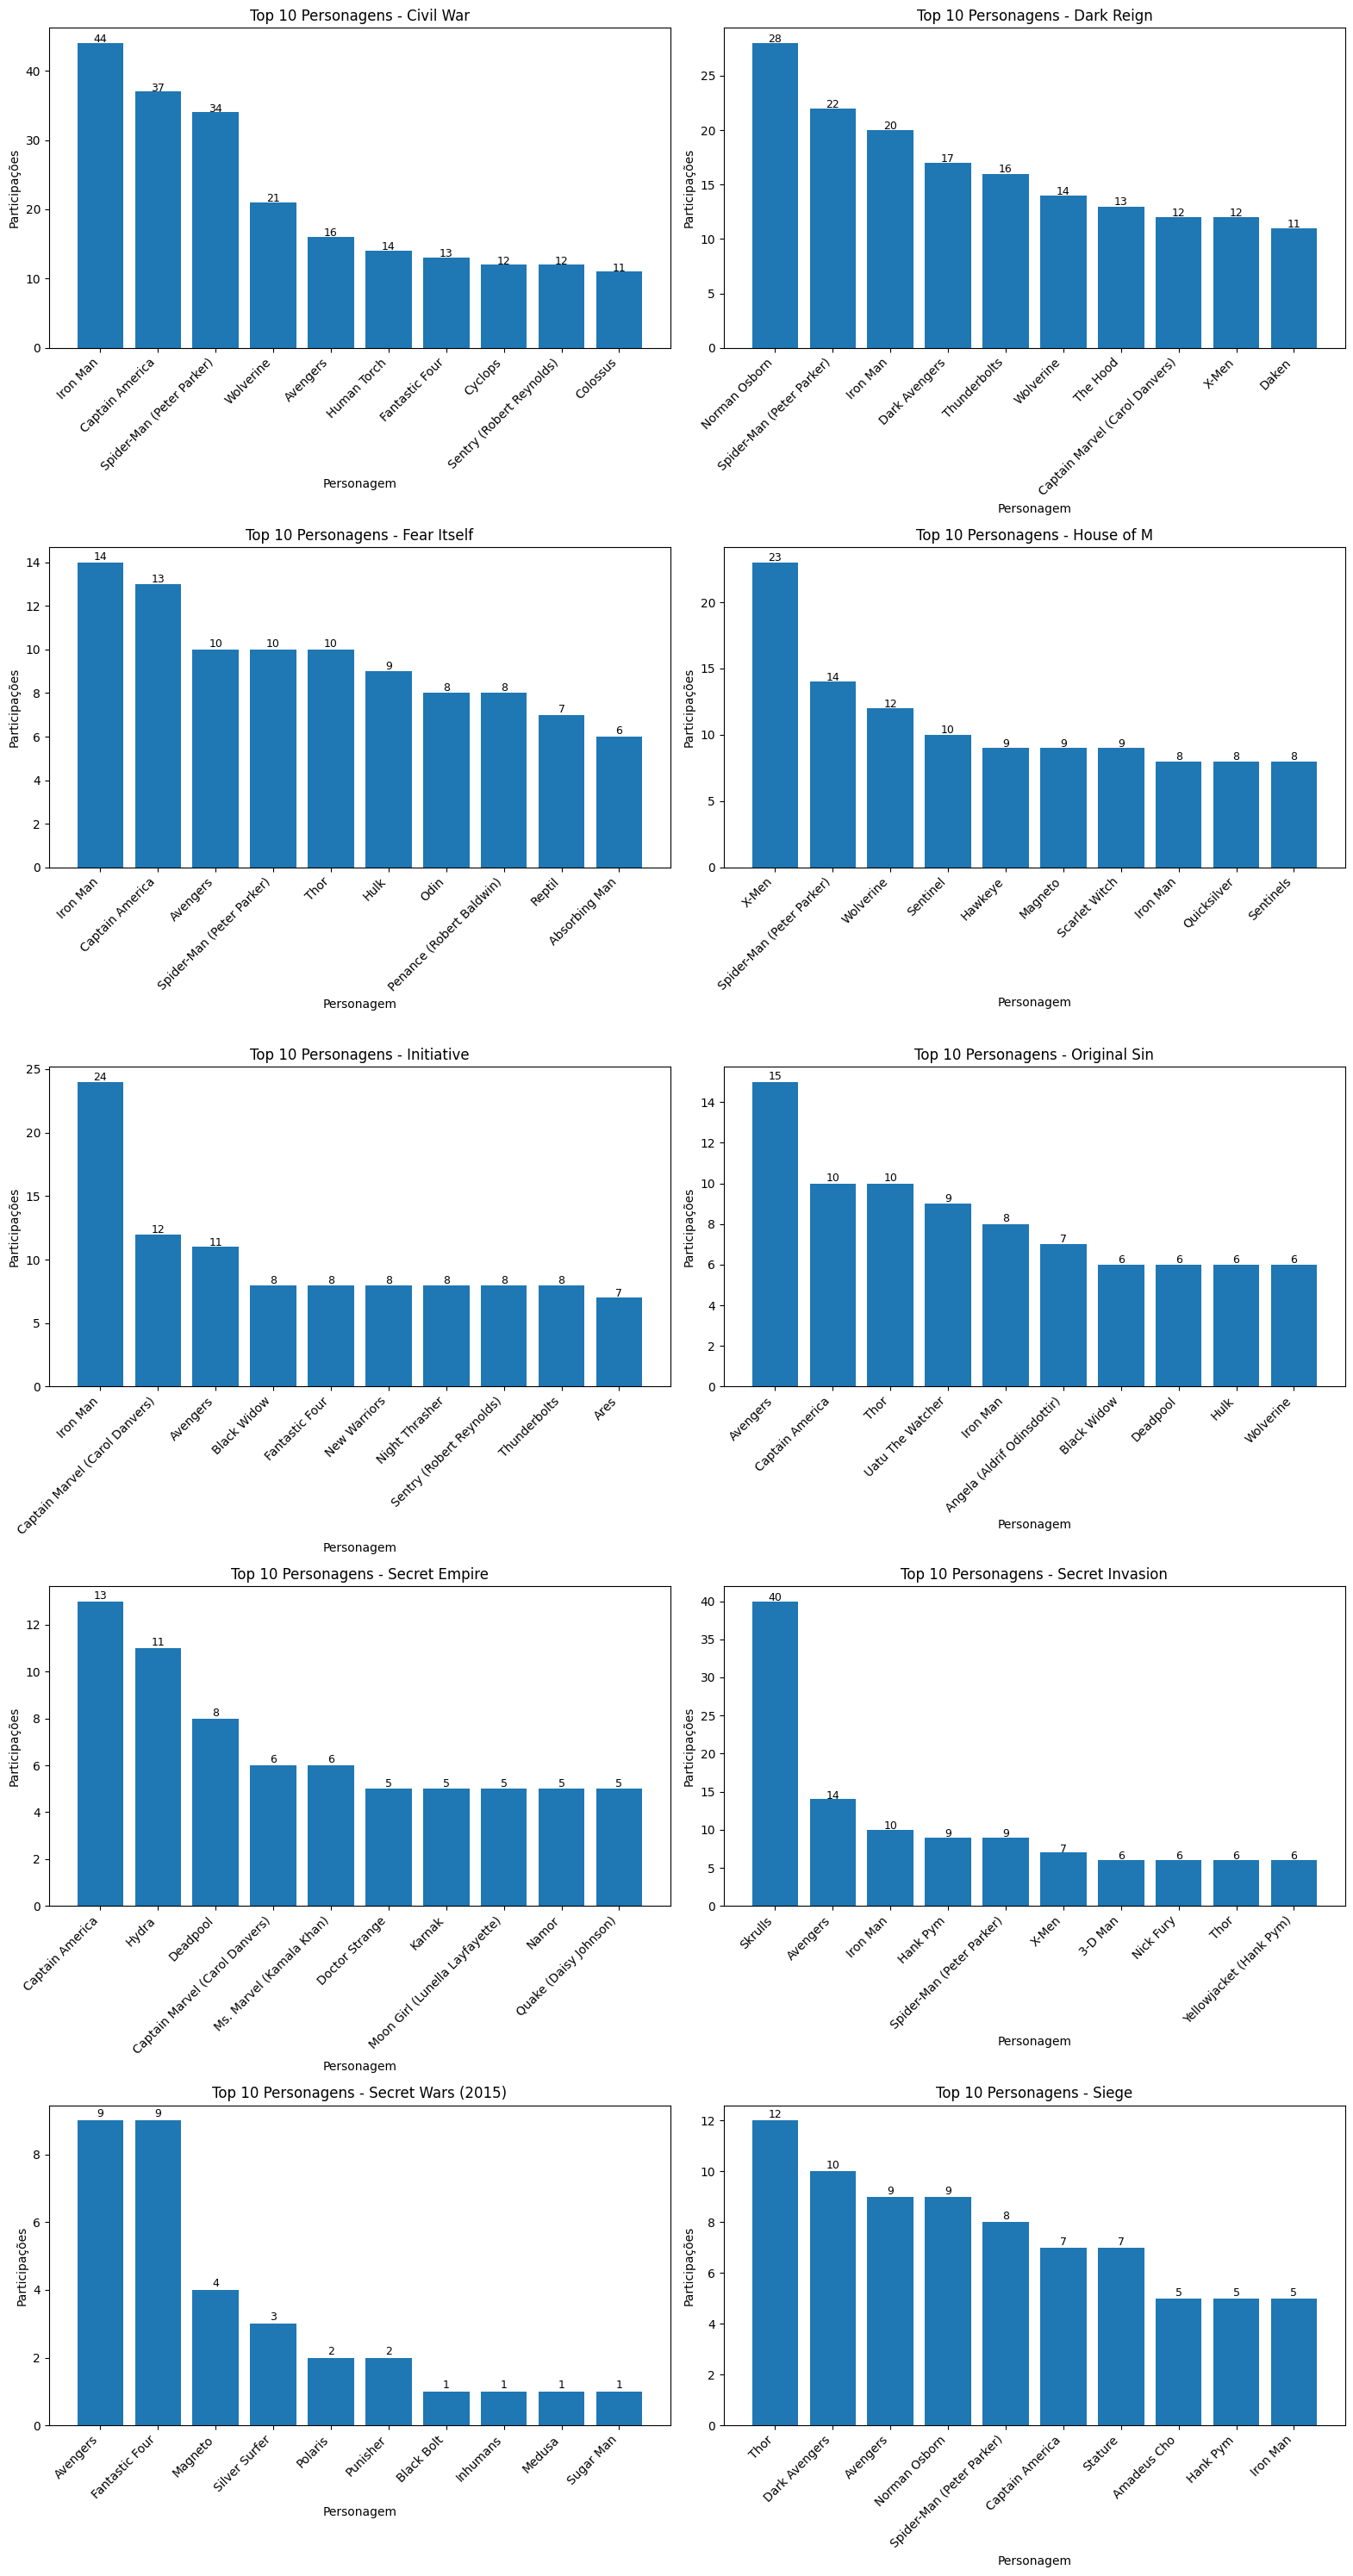

In [ ]:
eventos = df_comics['evento'].unique()
eventos.sort()

# Layout dos subplots
num_eventos = len(eventos)
linhas = (num_eventos + 1) // 2
colunas = 2

# Tamanho da figura
plt.figure(figsize=(16, 6 * linhas))

# Loop para criar um subplot por década
for i, dec in enumerate(eventos, 1):
    plt.subplot(linhas, colunas, i)
    dados = df_comics[df_comics['evento'] == dec].sort_values('total_participacoes', ascending=False)

    personagens = dados['personagem']
    participacoes = dados['total_participacoes']

    plt.bar(personagens, participacoes)
    plt.xlabel("Personagem")
    plt.ylabel("Participações")
    plt.title(f"Top 10 Personagens - {dec}")
    plt.xticks(rotation=45, ha='right')

    # Adiciona os valores acima das barras
    for j, v in enumerate(participacoes):
        plt.text(j, v + 0.1, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()